# Loan Application Status Prediction

Problem Statement:
This dataset includes details of applicants who have applied for loan. 
The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [2]:
df=pd.read_csv("C:/Users/Lenovo/Downloads/loanpred.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Checking Dimension of the dataset

In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status



In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The dataset is mixture of catagorical and continous value

In [6]:
#stastistical analysis
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Checking Null Values

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Checking unique values and its visualization of catagorical columns

1.0    475
0.0     89
Name: Credit_History, dtype: int64

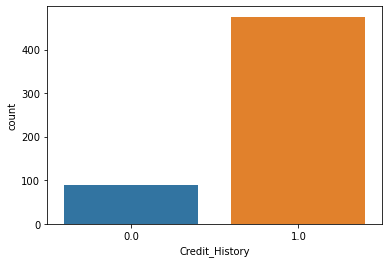

In [8]:
sns.countplot(x=df['Credit_History'],data=df)
df['Credit_History'].value_counts()

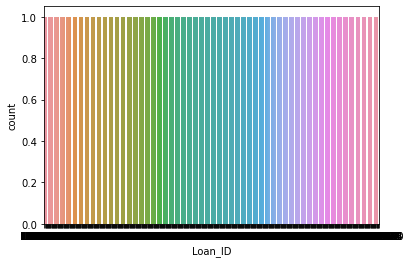

LP002522    1
LP001038    1
LP001119    1
LP001639    1
LP002534    1
           ..
LP001640    1
LP002347    1
LP002284    1
LP001520    1
LP001367    1
Name: Loan_ID, Length: 614, dtype: int64


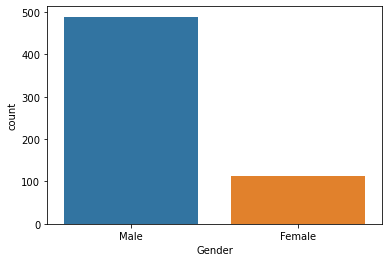

Male      489
Female    112
Name: Gender, dtype: int64


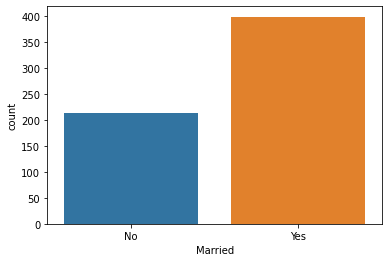

Yes    398
No     213
Name: Married, dtype: int64


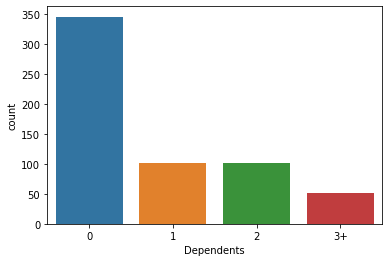

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


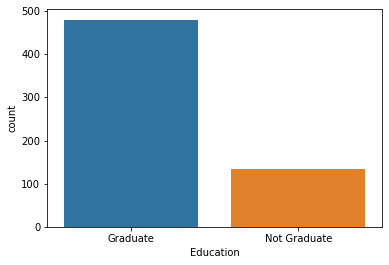

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


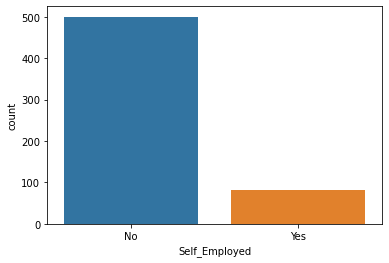

No     500
Yes     82
Name: Self_Employed, dtype: int64


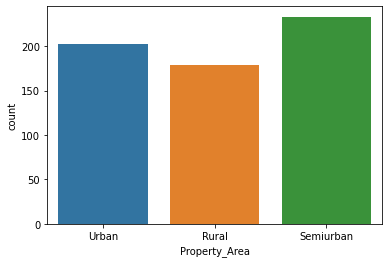

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


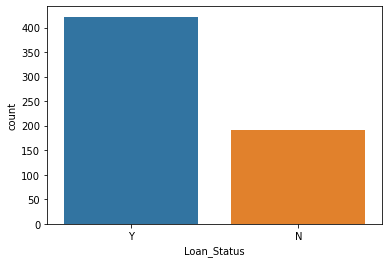

Y    422
N    192
Name: Loan_Status, dtype: int64


In [9]:
for i in df.columns:
    if df[i].dtypes=='object':
        sns.countplot(x=df[i],data=df)
        plt.show()
        print(df[i].value_counts())

replacing null values

In [10]:
df['Gender']=df['Gender'].replace(np.nan,'Male')

We relace nan values of Gender column by male because male are more than female

In [11]:
df['Married']=df['Married'].replace(np.nan,'Yes')

We replace 3 null values with yes because yes are more than no.

In [12]:
df['Dependents']=df['Dependents'].replace(np.nan,0)

We replace nan values with 0,because dependent columns has more 0

In [13]:
df['Self_Employed']=df['Self_Employed'].replace(np.nan,'No')

In [14]:
df['Credit_History']=df['Credit_History'].fillna(method='ffill')

In [15]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(method='ffill')

In [16]:
df['LoanAmount']=df['LoanAmount'].interpolate()

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
df['LoanAmount']=df['LoanAmount'].fillna(method='bfill')

In [19]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Null values are removed from the dataset

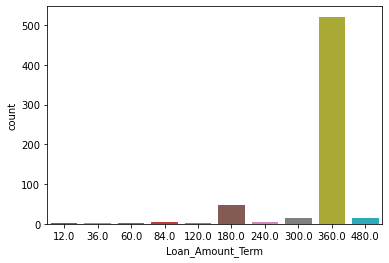

In [22]:
sns.countplot(x=df['Loan_Amount_Term'],data=df)

Checking unique values of columns

In [23]:
#df.head()

In [24]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [25]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', 0], dtype=object)

In [27]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [28]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [30]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64

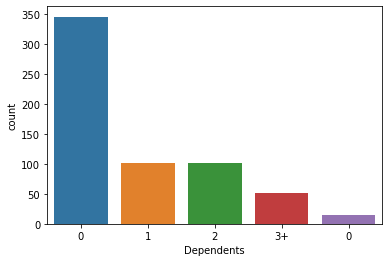

In [31]:
sns.countplot(x=df['Dependents'],data=df)
df['Dependents'].value_counts()

In [32]:
df['Dependents']=df['Dependents'].replace(0,'0')

# Visualization of independent columns with Loan_status column

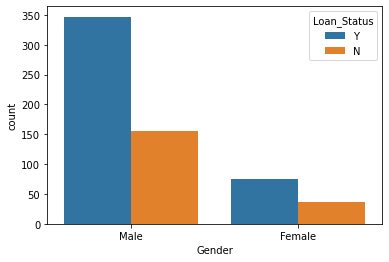

In [33]:
sns.countplot(x=df['Gender'],hue=df['Loan_Status'],data=df)

More males are on loan than females.

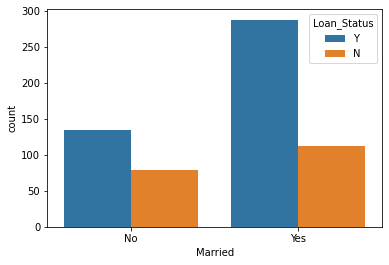

In [34]:
sns.countplot(x=df['Married'],hue=df['Loan_Status'],data=df)

Married people collect more loan than unmarried

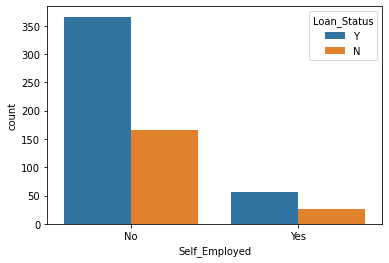

In [35]:
sns.countplot(x=df['Self_Employed'],hue=df['Loan_Status'],data=df)

Take loans is less of self-employed people. salaried people obtain more loan

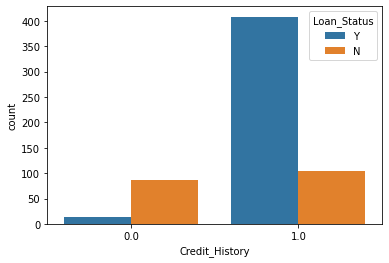

In [36]:
sns.countplot(x=df['Credit_History'],hue=df['Loan_Status'],data=df)

More people pay their loan.

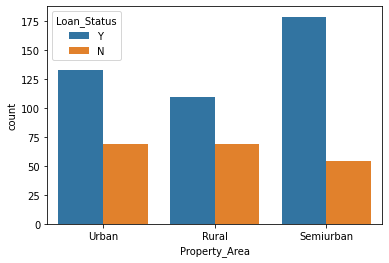

In [37]:
sns.countplot(x=df['Property_Area'],hue=df['Loan_Status'],data=df)

Semiurban gets more loan than urban and rural areas.Rural areas get less loan than both.

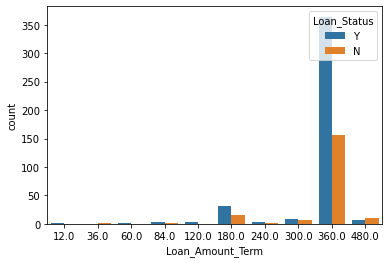

In [38]:
sns.countplot(x=df['Loan_Amount_Term'],hue=df['Loan_Status'],data=df)

many people go for 360 loan

In [39]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Converting Catagorical values to Numbers either by using get_dummies method or by LabelEncoder method

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [41]:
df['Married']=le.fit_transform(df['Married'])

In [42]:
df['Dependents']=le.fit_transform(df['Dependents'])

In [43]:
df['Education']=le.fit_transform(df['Education'])

In [44]:
df['Property_Area']=le.fit_transform(df['Property_Area'])

In [45]:
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [46]:
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [47]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [48]:
df=df.drop('Loan_ID',axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# Checking Corelation

In [88]:
df.corr()['Loan_Status']

Gender               0.017987
Married              0.091478
Dependents           0.010118
Education           -0.085884
Self_Employed       -0.003700
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.042259
Loan_Amount_Term    -0.033378
Credit_History       0.525152
Property_Area        0.032112
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

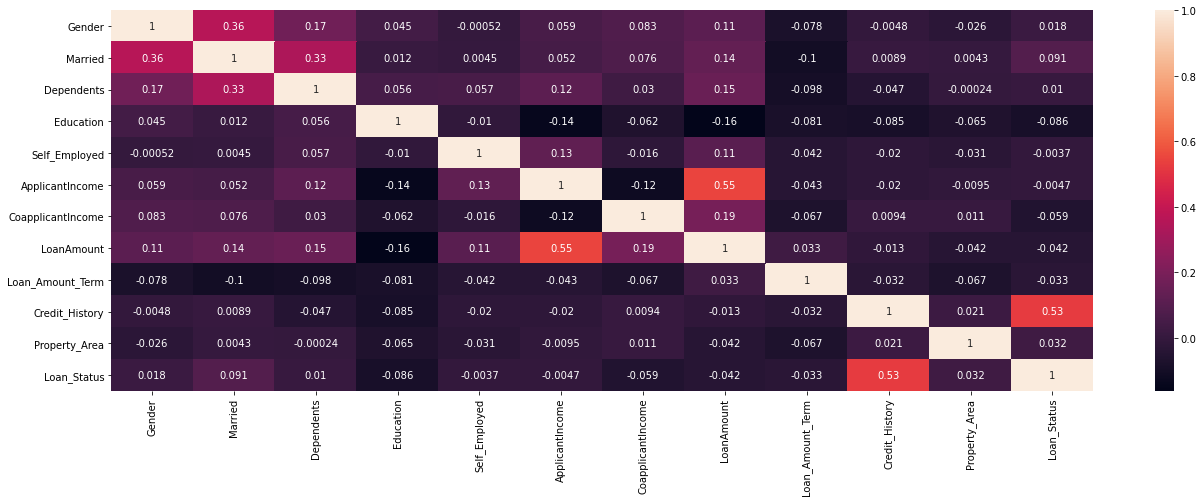

In [89]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

Credit History is highly corelated with our loan_status column

As we have index number,Loan_id is not necessery 

In [90]:
df=df.drop('Loan_ID',axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1



# Checking Outliers

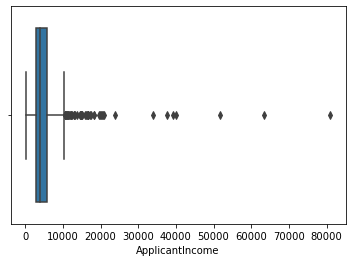

In [49]:
sns.boxplot(df['ApplicantIncome'])

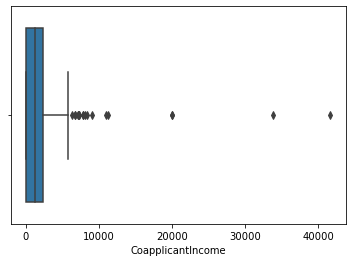

In [50]:
sns.boxplot(df['CoapplicantIncome'])

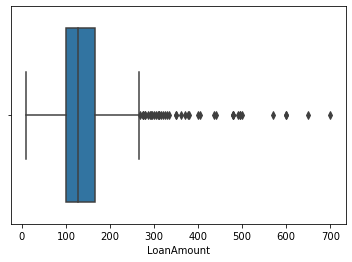

In [51]:
sns.boxplot(df['LoanAmount'])

In [52]:
df[df['ApplicantIncome']>50000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,1,1,3,0,0,51763,0.0,700.0,300.0,1.0,2,1
333,1,1,0,0,0,63337,0.0,490.0,180.0,1.0,2,1
409,1,1,3,0,0,81000,0.0,360.0,360.0,0.0,0,0


409 no.row is outlier as loan amount is 360,applicantincome is 81000 and loanamount term is 360.so we remove this row

In [53]:
df=df.drop(409,axis=0)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [55]:
df[df['CoapplicantIncome']>20000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
581,1,0,0,0,0,1836,33837.0,90.0,360.0,1.0,2,0
600,0,0,3,0,0,416,41667.0,350.0,180.0,1.0,2,0


In [56]:
df=df.drop([581,600],axis=0)

These two are outlier of the column as we see in boxplot

In [58]:
df[df['LoanAmount']>550]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,1,0,0,0,1,20166,0.0,650.0,480.0,0.0,2,1
155,1,1,3,0,0,39999,0.0,600.0,180.0,0.0,1,1
171,1,1,3,0,0,51763,0.0,700.0,300.0,1.0,2,1
369,1,1,0,0,0,19730,5266.0,570.0,360.0,1.0,0,0
561,0,1,1,0,1,19484,0.0,600.0,360.0,1.0,1,1


We may drop these rows

In [59]:
df=df.drop([130,155,171,369,561],axis=0)

In [60]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


The original dataset has614 rows and now its 606 rows.

In [61]:
dataloss=(614-606)/614
dataloss

0.013029315960912053

dataloss is 1.3%

# Checking Skewness

In [62]:
df.skew()

Gender              -1.656636
Married             -0.646596
Dependents           1.025631
Education            1.347319
Self_Employed        2.179586
ApplicantIncome      5.623420
CoapplicantIncome    3.379401
LoanAmount           2.046877
Loan_Amount_Term    -2.355446
Credit_History      -1.842112
Property_Area       -0.061126
Loan_Status         -0.822504
dtype: float64

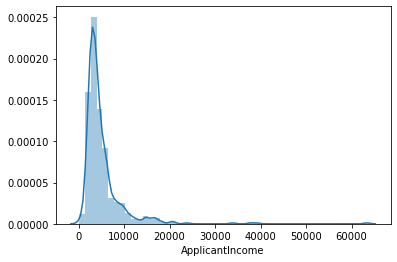

In [63]:
sns.distplot(df['ApplicantIncome'])

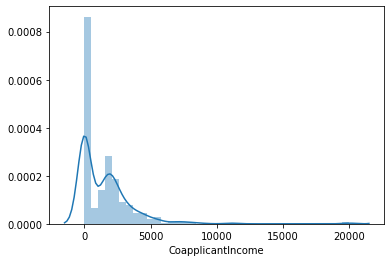

In [64]:
sns.distplot(df['CoapplicantIncome'])

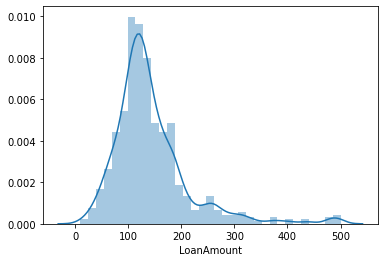

In [65]:
sns.distplot(df['LoanAmount'])

In [66]:
from sklearn.preprocessing import power_transform
df['ApplicantIncome']=power_transform(df[['ApplicantIncome']])

In [67]:
df['CoapplicantIncome']=power_transform(df[['CoapplicantIncome']])

In [68]:
df['LoanAmount']=power_transform(df[['LoanAmount']])

Skewness has been removed from the dataset

Divide dataset into dependent and independent variable

In [71]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [73]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.590278,-1.109109,-0.024316,360.0,1.0,2
1,1,1,1,0,0,0.191675,0.749764,-0.024316,360.0,1.0,0
2,1,1,0,0,1,-0.515921,-1.109109,-1.346466,360.0,1.0,2
3,1,1,0,1,0,-0.770502,0.894716,-0.159213,360.0,1.0,2
4,1,0,0,0,0,0.631569,-1.109109,0.180389,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.573374,-1.109109,-1.207362,360.0,1.0,0
610,1,1,3,0,0,0.010006,-1.109109,-2.257342,180.0,1.0,0
611,1,1,1,0,0,1.107141,0.197163,1.483905,360.0,1.0,2
612,1,1,2,0,0,1.007712,-1.109109,0.795507,360.0,1.0,2


In [74]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 606, dtype: int32

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier()

Choosing Best Random_state

In [76]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy is",maxacc,"on random_state",maxrs)

best accuracy is 0.8032786885245902 on random_state 80


In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=80)

In [78]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [79]:
model=[SVC(),DecisionTreeClassifier(),LogisticRegression(),GaussianNB(),KNeighborsClassifier(),XGBClassifier()]

In [80]:
for i in model:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(i)
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    

SVC()
0.6978021978021978
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.70      1.00      0.82       127

    accuracy                           0.70       182
   macro avg       0.35      0.50      0.41       182
weighted avg       0.49      0.70      0.57       182

[[  0  55]
 [  0 127]]
DecisionTreeClassifier()
0.7692307692307693
              precision    recall  f1-score   support

           0       0.61      0.64      0.62        55
           1       0.84      0.83      0.83       127

    accuracy                           0.77       182
   macro avg       0.73      0.73      0.73       182
weighted avg       0.77      0.77      0.77       182

[[ 35  20]
 [ 22 105]]


C:\Users\Lenovo\anacon\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. 

LogisticRegression()
0.8351648351648352
              precision    recall  f1-score   support

           0       0.96      0.47      0.63        55
           1       0.81      0.99      0.89       127

    accuracy                           0.84       182
   macro avg       0.89      0.73      0.76       182
weighted avg       0.86      0.84      0.82       182

[[ 26  29]
 [  1 126]]
GaussianNB()
0.8406593406593407
              precision    recall  f1-score   support

           0       0.96      0.49      0.65        55
           1       0.82      0.99      0.90       127

    accuracy                           0.84       182
   macro avg       0.89      0.74      0.77       182
weighted avg       0.86      0.84      0.82       182

[[ 27  28]
 [  1 126]]
KNeighborsClassifier()
0.7307692307692307
              precision    recall  f1-score   support

           0       0.61      0.31      0.41        55
           1       0.75      0.91      0.83       127

    accuracy          

# Using Ensemble Algorithm

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8186813186813187
              precision    recall  f1-score   support

           0       0.78      0.56      0.65        55
           1       0.83      0.93      0.88       127

    accuracy                           0.82       182
   macro avg       0.80      0.75      0.76       182
weighted avg       0.81      0.82      0.81       182

[[ 31  24]
 [  9 118]]


In [83]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred=ad.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
    

0.8076923076923077
              precision    recall  f1-score   support

           0       0.76      0.53      0.62        55
           1       0.82      0.93      0.87       127

    accuracy                           0.81       182
   macro avg       0.79      0.73      0.75       182
weighted avg       0.80      0.81      0.80       182

[[ 29  26]
 [  9 118]]


In [84]:
gc=GradientBoostingClassifier()
gc.fit(x_train,y_train)
y_pred=gc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8241758241758241
              precision    recall  f1-score   support

           0       0.81      0.55      0.65        55
           1       0.83      0.94      0.88       127

    accuracy                           0.82       182
   macro avg       0.82      0.75      0.77       182
weighted avg       0.82      0.82      0.81       182

[[ 30  25]
 [  7 120]]


In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
rf=RandomForestClassifier()
for i in range(2,10):
    cvscore=cross_val_score(rf,x,y,cv=i)
    print('for',i,'accuracy is',cvscore.mean())

for 2 accuracy is 0.8052805280528053
for 3 accuracy is 0.787128712871287
for 4 accuracy is 0.7871645172533984
for 5 accuracy is 0.7838368784717519
for 6 accuracy is 0.7904290429042904
for 7 accuracy is 0.7922633367701531
for 8 accuracy is 0.785548245614035
for 9 accuracy is 0.788801092576334


In [87]:
cv=2

In [90]:
svc=SVC()
dt=DecisionTreeClassifier()
gn=GaussianNB()
knn=KNeighborsClassifier()
ex=XGBClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
gd=GradientBoostingClassifier()
lg=LogisticRegression()

In [91]:
model=[svc,dt,gn,knn,ex,rf,ad,gd,lg]

In [95]:
for i in model:
    cvscore=cross_val_score(i,x,y,cv=2)
    print('accuracy score of',i,'is',cvscore.mean())

accuracy score of SVC() is 0.6897689768976898
accuracy score of DecisionTreeClassifier() is 0.7277227722772277
accuracy score of GaussianNB() is 0.7953795379537953
accuracy score of KNeighborsClassifier() is 0.7227722772277227
[10:43:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Lenovo\anacon\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score of XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None) is 0.7607260726072607
accuracy score of 

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

# Checking AUC_ROC score

In [100]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


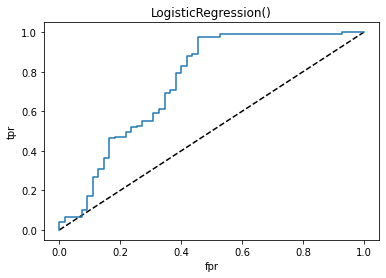

0.7496062992125985


In [117]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(lg)
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

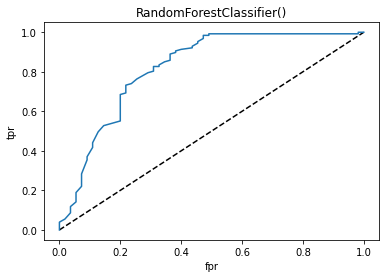

0.8205440229062276


In [118]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(rf)
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

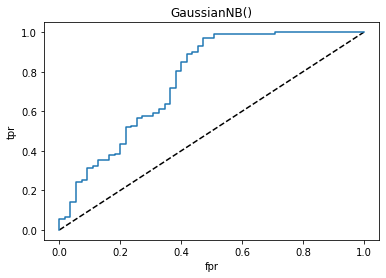

0.7607730851825341


In [108]:
gn=GaussianNB()
gn.fit(x_train,y_train)
y_pred_prob=gn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(gn)
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

C:\Users\Lenovo\anacon\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:07:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


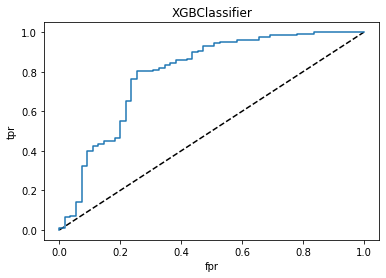

0.7937007874015748


In [119]:
ex=XGBClassifier()
ex.fit(x_train,y_train)
y_pred_prob=ex.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('XGBClassifier')
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

We conclude that RandomForestClassifier is best algorithm for the dataset

# HyperParameter Tuning

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
parameter={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}

In [113]:
rf=RandomForestClassifier()
gscv=GridSearchCV(rf,parameter,cv=2)
gscv.fit(x_train,y_train)
gscv.best_params_

{'criterion': 'entropy', 'max_features': 'auto'}

In [114]:
gscv.best_estimator_

RandomForestClassifier(criterion='entropy')

In [115]:
rf=RandomForestClassifier(criterion='entropy',max_features='auto')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8296703296703297
              precision    recall  f1-score   support

           0       0.85      0.53      0.65        55
           1       0.82      0.96      0.89       127

    accuracy                           0.83       182
   macro avg       0.84      0.74      0.77       182
weighted avg       0.83      0.83      0.82       182

[[ 29  26]
 [  5 122]]


# Saving Model

In [116]:
import joblib
joblib.dump(rf,'loanpred.obj')

['loanpred.obj']